In [1]:
import os, sys
try:
    import dltk
except ImportError:
    print('Appending DLTK root path')
    sys.path.append(os.path.join('..', '..'))
    import dltk

import numpy as np
from matplotlib import pyplot as plt
from IPython import display

# iPython specific
%matplotlib inline
plt_args = dict(cmap = 'viridis', interpolation = 'none')

Appending DLTK root path


In [2]:
# just a few simple test 3d images to show everything works
thin_3d_eye = np.expand_dims(np.expand_dims(np.expand_dims(np.eye(5), 0), -1), -1)

# Use Bilinear Upsampling
Here we show how you can use the BilinearUpsampling module inside of a Keras module

In [3]:
from dltk.core.modules import BilinearUpsample

In [4]:
os.environ['keras_backend'] = 'tensorflow' # this must be true to work with Keras
from keras.models import Sequential
from keras.layers import Lambda
bup_model = Sequential()
bup_model.add(Lambda(BilinearUpsample(trainable = False, strides = (4,4,4)),
                     name = 'BilinearLayer', input_shape = thin_3d_eye.shape[1:]))
bup_model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
BilinearLayer (Lambda)       (None, 20, 20, 4, 1)      0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


C:\IntelPython35\envs\tf-xg-boost\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


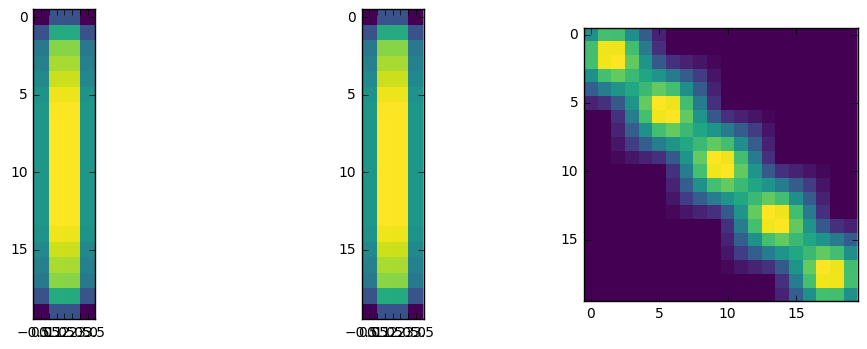

In [5]:
up_img = bup_model.predict(thin_3d_eye)[0, :, :, :, 0]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
ax1.imshow(np.sum(up_img,0),**plt_args)
ax2.imshow(np.sum(up_img,1),**plt_args)
ax3.imshow(np.sum(up_img,2),**plt_args)

# Vanilla Residual Unit

In [6]:
from dltk.core.modules import VanillaResidualUnit
from keras import backend as K
vru_model = Sequential()
def vru_layer(in_tensor):
    """We require the function wrapper since it needs information about training and testing phase"""
    base_vru =  VanillaResidualUnit(out_filters = 1, kernel_size=5, stride=(1, 1, 1), relu_leakiness=0.01)
    return base_vru(in_tensor, True) # K.learning_phase()
vru_model.add(Lambda(vru_layer, name = 'ResUnit', input_shape = thin_3d_eye.shape[1:]))
vru_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ResUnit (Lambda)             (None, 5, 5, 1, 1)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


C:\IntelPython35\envs\tf-xg-boost\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


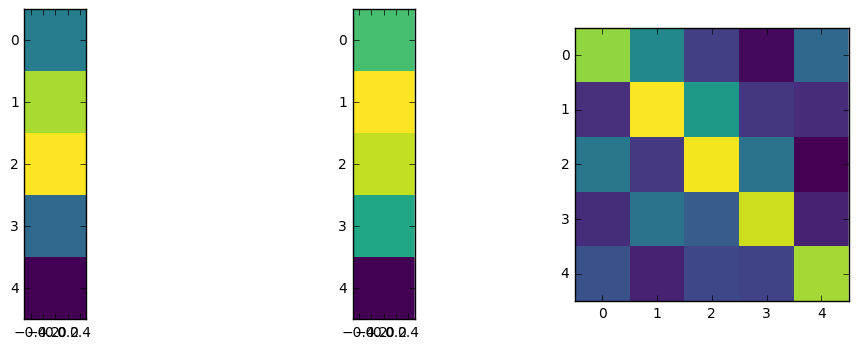

In [7]:
vru_img = vru_model.predict(thin_3d_eye)[0, :, :, :, 0]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
ax1.imshow(np.sum(vru_img,0),**plt_args)
ax2.imshow(np.sum(vru_img,1),**plt_args)
ax3.imshow(np.sum(vru_img,2),**plt_args)